# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

Bussiness Objective: The primary objective is determine what are the key attributes of an used car that drives the consumer behavior in an used car market.

Current situation: Inorder to assess the market we need to have access to all of the sales data across the geographies where the used car dealership operates and in some cases the also the data from the places where the dealership doesnot operate, because this will also help assess potential new markets.

Data Mining Goals:

1. Collect all the sales data over the years.
2. Collect all the customer information with following features
     - Age
     - Occupation
     - Income
     - Gender

3. Collect all the data pertaining to the available inventory of vehicles. Key attributes to look for will be 

     - No of cylinders
     - Fuel
     - Odometer
     - transmission
     - etc

### Data Understanding

Here are the first step I would like to understand the dataset.
1. First thing will be to analyse what columns or features will help in achieving my target goal.
2. After identifying the key columns, the next goal will be to do a data quality check. 
    - Does the dataset have sufficient information to achieve the goal.
    - Is there any missing info.
    - Is dataset in right format?
    - Does the dataset contains highly correlated values?
    - I would also like to check the variance of data, becuase higher the variance , higher is quality for running machine learning algorithms.

    

Now after looking at first the data set, I can infer following points wrt dataset

1. The dataset contains only the information on the car.
2. It lacks data on the customer behavior and also the sales information.
3. I see lot of rows have missing values. In this case where number of rows with mising column values is less, then we can drop those rows, but there are cases where the column itself has lot missing data, then it is better to drop that column itself from the datset.
4. Some the critical categorical data can be tranformed to numerical values using onehot encoding. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_absolute_error

In [154]:
df=pd.read_csv('data/vehicles.csv')

In [155]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [156]:
df.drop(columns=['VIN','id'],axis=1,inplace=True)


In [157]:
df_analysis=df.convert_dtypes()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   price         426880 non-null  Int64 
 2   year          425675 non-null  Int64 
 3   manufacturer  409234 non-null  string
 4   model         421603 non-null  string
 5   condition     252776 non-null  string
 6   cylinders     249202 non-null  string
 7   fuel          423867 non-null  string
 8   odometer      422480 non-null  Int64 
 9   title_status  418638 non-null  string
 10  transmission  424324 non-null  string
 11  drive         296313 non-null  string
 12  size          120519 non-null  string
 13  type          334022 non-null  string
 14  paint_color   296677 non-null  string
 15  state         426880 non-null  string
dtypes: Int64(3), string(13)
memory usage: 53.3 MB


In [158]:
df_analysis.describe(include='string')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,131904,63465,87056,79285,50614


In [159]:
from sklearn.preprocessing import LabelEncoder

for column in df_analysis.select_dtypes(include='string').columns:
    df_analysis[column]=df_analysis[column].replace(np.nan, 'other')
    df_analysis[column] = LabelEncoder().fit_transform(df_analysis[column])
    

for column in df_analysis.select_dtypes(include='int64').columns:
    df_analysis[column]=df_analysis[column].replace(np.nan, 0)
    df_analysis[column] = LabelEncoder().fit_transform(df_analysis[column])
    


In [160]:
df_filtered = df_analysis[(df_analysis['price'] >= 100) & (df_analysis['price'] <= 1000000)]
df_filtered.shape


(390436, 16)

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)
df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [162]:
X=df_scaled.drop('price',axis=1)
y=df_scaled['price']

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [184]:

ridge_pipe=Pipeline([('ply_feature',PolynomialFeatures(degree = 2, include_bias = False)),
                     ('pol_regres',Ridge())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
grid=GridSearchCV(ridge_pipe, parameters_to_tune, cv=10)
grid.fit(X_train,y_train)
test_mse=mean_squared_error(grid.predict(X_test),y_test)
test_mae=mean_absolute_error(grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
grid.best_params_,grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 100},
 0.632143050385406,
 0.3676730329351235,
 0.4476926300700457,
 0.6063604810136652)

In [186]:
seq_ridge_pipe=Pipeline([('seq_feature',SequentialFeatureSelector(Ridge(),n_features_to_select=4)),
                     ('pol_regres',Ridge())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
seq_ridge_grid=GridSearchCV(seq_ridge_pipe, parameters_to_tune, cv=10)
seq_ridge_grid.fit(X_train,y_train)
test_mse=mean_squared_error(seq_ridge_grid.predict(X_test),y_test)
test_mae=mean_absolute_error(seq_ridge_grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
seq_ridge_grid.best_params_,seq_ridge_grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 10},
 0.40944652587480884,
 0.5852171054164604,
 0.6004776034583587,
 0.7649948401240759)

In [187]:
from sklearn.linear_model import Lasso
seq_lasso_pipe=Pipeline([('seq_feature',SequentialFeatureSelector(Lasso(),n_features_to_select=4)),
                     ('pol_regres',Lasso())])
parameters_to_tune = [{'pol_regres__alpha':[0.1,10,100,1000]}]
seq_lasso_grid=GridSearchCV(seq_lasso_pipe, parameters_to_tune, cv=10)
seq_lasso_grid.fit(X_train,y_train)
test_mse=mean_squared_error(seq_lasso_grid.predict(X_test),y_test)
test_mae=mean_absolute_error(seq_lasso_grid.predict(X_test),y_test)
test_rmse=np.sqrt(test_mse)
seq_lasso_grid.best_params_,seq_lasso_grid.best_score_,test_mse,test_mae,test_rmse

({'pol_regres__alpha': 0.1},
 0.07773963825839988,
 0.9232878069568385,
 0.8329017710405356,
 0.9608786640137446)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I have run 3 different kinds of regression with grid search CV
1. Ridge regression with polynomial features.
2. Ridge regression with sequential feature selection.
3. Lasso regression with sequential feature selection.

Here are the results

![alt text](image.png)



In [176]:
# For Ridge Regression
ridge_best_features = seq_ridge_grid.best_estimator_.named_steps['seq_feature'].get_support(indices=True)
ridge_best_feature_names = X.columns[ridge_best_features]
print("Best features for Ridge Regression: ", ridge_best_feature_names)

# For Lasso Regression
lasso_best_features = seq_lasso_grid.best_estimator_.named_steps['seq_feature'].get_support(indices=True)
lasso_best_feature_names = X.columns[lasso_best_features]
print("Best features for Lasso Regression: ", lasso_best_feature_names)

best_params_ridge = grid.best_params_
best_features=ridge_best_feature_names
print("Best Features for Ridge Regression with polynomial features: ",best_features)

Best features for Ridge Regression:  Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')
Best features for Lasso Regression:  Index(['region', 'year', 'manufacturer', 'model'], dtype='object')
Best Features for Ridge Regression with polynomial features:  Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')


### Lets try to plot the residual plots of all the three regression to measure the performance.

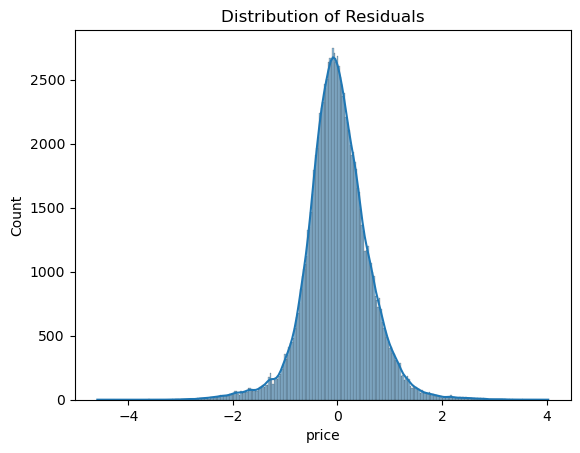

In [181]:
residuals = y_test - grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals of Ridge Regression with Polynomial Features')
plt.show()

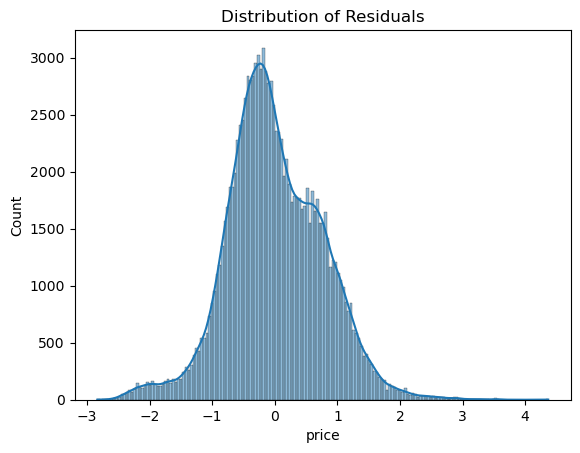

In [178]:
residuals = y_test - seq_ridge_grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals with Sequential Feature Selection for Ridge Regression')
plt.show()

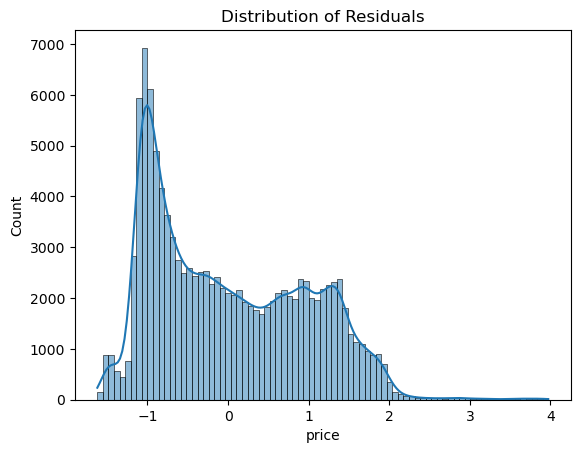

In [179]:
residuals = y_test - seq_lasso_grid.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals with Sequential Feature Selection for Lasso Regression')
plt.show()

Based on the results, the best model is the Ridge Regression with polynomial features. The best features for this model are: 
- Year
- Cylinder
- Fuel
- Odometer 

The distribution of residuals for this model is also the most normal compared to the other models.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on the exploratory data analysis, consumers behavior are majorly around four attributes of a car and will impact the prices of the car.

- Year of Manufacturing
- Cylinder
- Fuel
- Odometer

If they can build a web application which will help them predict the price of a car which they will buy from a seller and with appropriate margins can sell it to potential buyer with some profit. 